# Exam R
Hélène Hulsebosch 2014848

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [1]:
library(tidyverse)
library(gvlma)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 2.2.1     <U+221A> purrr   0.2.4
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.4
<U+221A> tidyr   0.8.0     <U+221A> stringr 1.3.0
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1


## Data

The data are given:


In [5]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

df1

V1       epsilon     response    group
1  3.588198 -3.37338662  -7.5497820 1    
2  8.094746  1.67557409 -11.5139183 2    
3  4.680792  0.30674624  -6.0548384 1    
4  8.947157 -2.27627387 -17.1705871 2    
5  9.464206  2.50762984 -13.4207813 2    
6  1.410008  0.85292844   1.0329115 1    
7  5.752949 -0.59014297  -9.0960418 2    
8  9.031771  1.79025132 -13.2732915 2    
9  5.962915  1.75626698  -7.1695633 2    
10 5.109533  1.64316216  -5.5759031 2    
11 9.611500  1.37728051 -14.8457197 2    
12 5.080007  1.10783531  -6.0521795 2    
13 7.098136 -0.12382342 -11.3200949 2    
14 6.153701 -0.61192533  -9.9193266 2    
15 1.926322 -0.76094200  -1.6135863 1    
16 9.098425 -1.38941396 -16.5862634 2    
17 3.214790 -0.41583456  -3.8454138 1    
18 1.378536 -2.53079270  -2.2878643 1    
19 3.951286  4.33791193  -0.5646610 1    
20 9.590533  2.41592400 -13.7651417 2    
21 9.005854 -2.24621717 -17.2579249 2    
22 7.235231 -0.80576967 -12.2762310 2    
23 6.764561 -0.93331071 -11.4624334 2    
24 9.948428  1.55993024 -15.3369257 2    
25 6.901352 -0.16673813 -10.9694425 2    
26 7.376774  0.50663703 -11.2469114 2    
27 5.896594 -0.05709351  -8.8502820 2    
28 6.347278 -0.08574091  -9.7802973 2    
29 3.602438  2.73720457  -1.4676707 1    
30 2.324023 -0.45154197  -2.0995876 1    
31 9.667218  3.03294121 -13.3014950 2    
32 9.120691 -3.09750561 -18.3388884 2    
33 7.216348  1.16922750 -10.2634675 2    
34 8.159207  0.24770849 -13.0707050 2    
35 1.221523  0.43188314   0.9888368 1    
36 5.300164  0.75927897  -6.8410485 2    
37 7.826136 -1.00464691 -13.6569186 2    
38 2.947671 -0.66641477  -3.5617576 1    
39 3.863629 -2.03715077  -6.7644089 1    
40 3.084632 -2.14358245  -5.3128466 1    
41 2.285200  0.60705728  -0.9633431 1    
42 4.730917  0.89641956  -5.5654145 1    
43 4.723519  0.10600845  -6.3410294 1    
44 4.319609  1.84453494  -3.7946832 1    
45 2.372003  4.10016937   2.3561639 1    
46 2.249255 -0.98206233  -2.4805715 1    
47 3.097307 -4.61833775  -7.8129515 1    
48 5.193662  2.01147705  -5.3758471 2    
49 3.393754 -1.41840153  -5.2059091 1    
50 8.720449 -1.37601723 -15.8169161 2

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

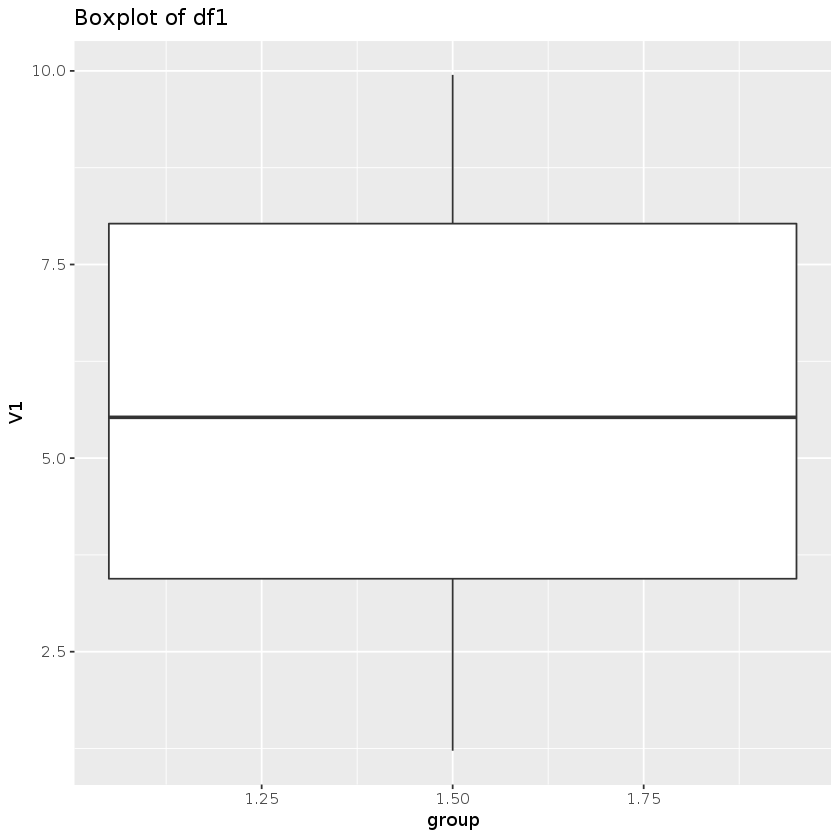

In [86]:
boxplot <- ggplot(df1, aes(x = group, y = V1)) +
        geom_boxplot() +
ggtitle("Boxplot of df1")

boxplot

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [7]:
reg1 <- lm(data =df1, V1 ~ group)
summary(reg1)


Call:
lm(formula = V1 ~ group, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49501 -1.05796  0.02595  1.34275  2.37341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4450     0.6707  -2.154   0.0363 *  
group         4.5100     0.4052  11.130 6.78e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.414 on 48 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.7149 
F-statistic: 123.9 on 1 and 48 DF,  p-value: 6.783e-15


check if the assumptions of linear regression are met with the `gvlma()` function.

In [9]:
gvlma(reg1)


Call:
lm(formula = V1 ~ group, data = df1)

Coefficients:
(Intercept)        group  
     -1.445        4.510  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                       Value p-value                Decision
Global Stat        3.756e+00  0.4401 Assumptions acceptable.
Skewness           1.037e-01  0.7474 Assumptions acceptable.
Kurtosis           2.627e+00  0.1050 Assumptions acceptable.
Link Function      1.866e-16  1.0000 Assumptions acceptable.
Heteroscedasticity 1.025e+00  0.3114 Assumptions acceptable.

In this case, we may conclude that the assumptions are met.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



I did this assignment in different steps because the first time I tried I got an error. By making this assignment step by step, it was more clearly where my error was. 

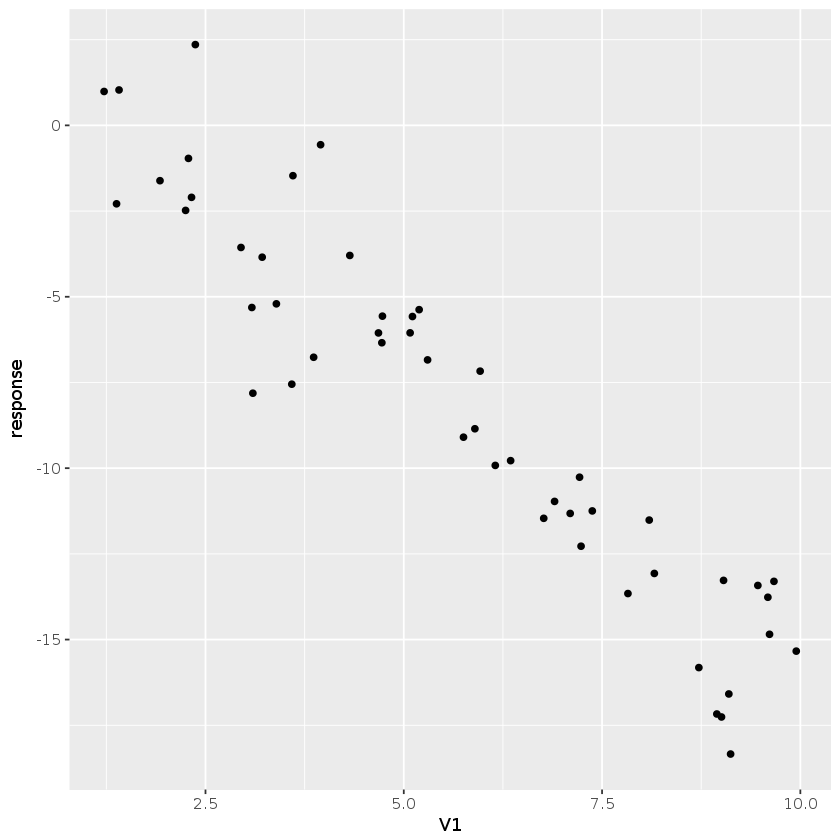

In [24]:
plot1 <-ggplot(data = df1, aes(x = V1, y = response)) +
  geom_point()
plot1

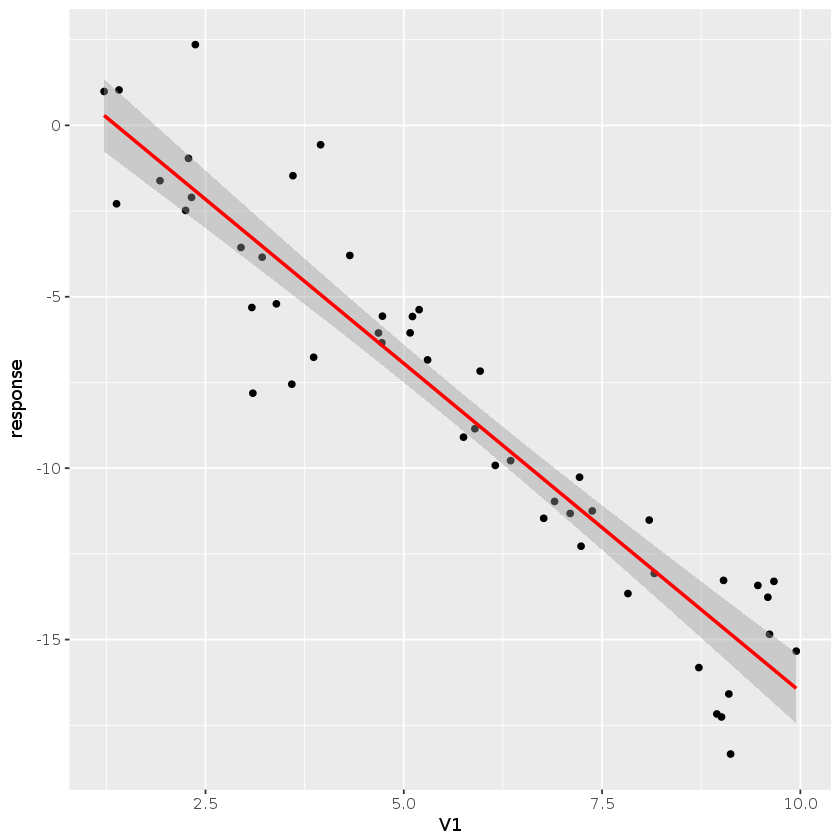

In [30]:
plot2 <- plot1 + geom_smooth(method = "lm", se = TRUE, color="red")

plot2

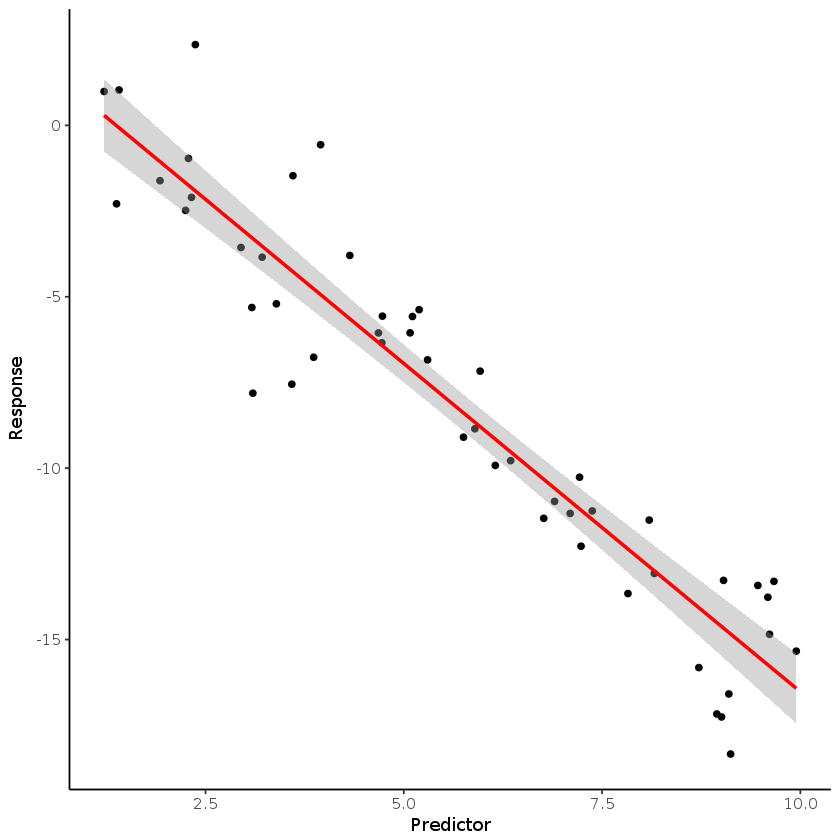

In [33]:
plot3 <- plot2 + scale_x_continuous("Predictor") +
scale_y_continuous("Response") +
theme_classic()

plot3

# Assigment 2

# Packages

In [35]:
library(thematicmaps)
library(tidyverse)

Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/share/gdal/2.1
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.5.1-CAPI-1.9.1 r4246 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [37]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")

head(map_municipal)

name       id x        y        order hole  piece group
1 Appingedam 0  251260.5 594393.8 1     FALSE 1     0.1  
2 Appingedam 0  251427.8 594486.7 2     FALSE 1     0.1  
3 Appingedam 0  251668.8 594646.8 3     FALSE 1     0.1  
4 Appingedam 0  251713.5 594770.9 4     FALSE 1     0.1  
5 Appingedam 0  251354.6 595461.4 5     FALSE 1     0.1  
6 Appingedam 0  251310.3 596022.5 6     FALSE 1     0.1

## Assignment 2b

Now you can make an empty map of the Netherlands.

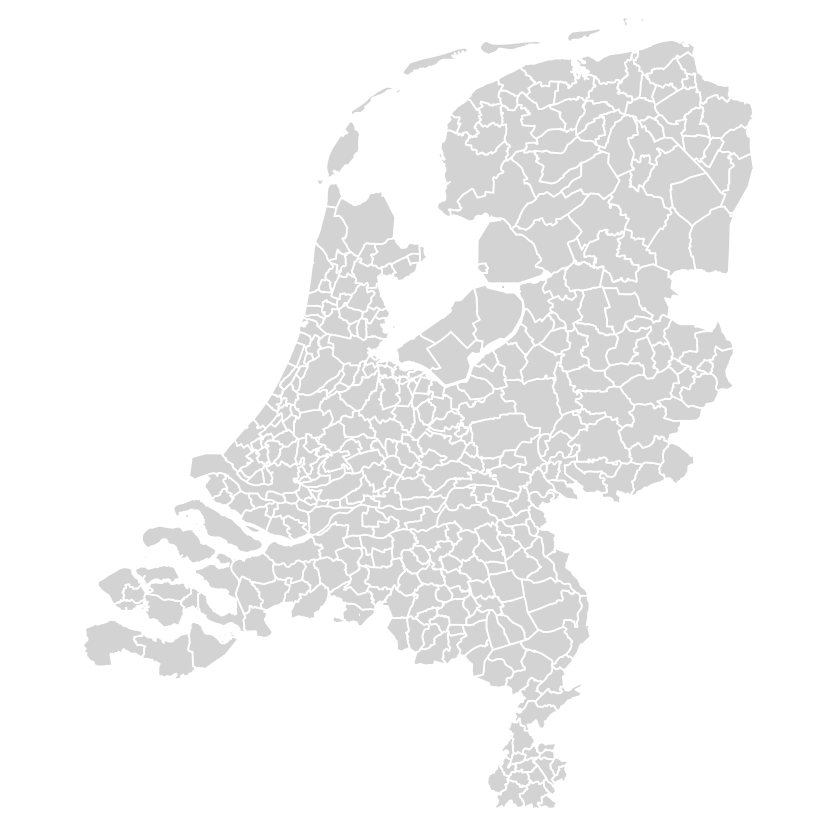

In [38]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [48]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv")

pc4_locations$X_numeric <- as.numeric(pc4_locations$X)
pc4_locations$Y_numeric <- as.numeric(pc4_locations$Y)

str(pc4_locations)

'data.frame':	4066 obs. of  5 variables:
 $ PC4      : int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X        : Factor w/ 4066 levels "100024.115074611",..: 528 513 482 460 491 485 502 543 559 544 ...
 $ Y        : Factor w/ 4066 levels "308396.770615801",..: 2500 2509 2557 2552 2518 2497 2473 2487 2501 2529 ...
 $ X_numeric: num  528 513 482 460 491 485 502 543 559 544 ...
 $ Y_numeric: num  2500 2509 2557 2552 2518 ...


## Assignment 2d

### 2di

Read in the school data


In [68]:
schools <- read.csv2("../Sourcedata/schools.csv")

schools

PROVINCIE            BEVOEGD.GEZAG.NUMMER BRIN.NUMMER VESTIGINGSNUMMER
1                         41152                23HC        23HC04          
2    Drenthe              10053                18BR        18BR00          
3    Drenthe              10053                18BR        18BR01          
4    Drenthe              13273                20LO        20LO00          
5    Drenthe              13273                20LO        20LO01          
6    Drenthe              13273                20LO        20LO02          
7    Drenthe              13273                20LO        20LO03          
8    Drenthe              13273                20LO        20LO04          
9    Drenthe              13273                20LO        20LO08          
10   Drenthe              13273                20LO        20LO09          
11   Drenthe              13273                20LO        20LO10          
12   Drenthe              13737                06DT        06DT00          
13   Drenthe              13737                19IW        19IW00          
14   Drenthe              13737                19IW        19IW02          
15   Drenthe              13737                19IW        19IW04          
16   Drenthe              13737                19IW        19IW05          
17   Drenthe              31108                01NJ        01NJ08          
18   Drenthe              31108                01NJ        01NJ09          
19   Drenthe              31108                01NJ        01NJ10          
20   Drenthe              31108                01NJ        01NJ11          
21   Drenthe              31108                01NJ        01NJ15          
22   Drenthe              35647                00PF        00PF00          
23   Drenthe              41143                00DI        00DI01          
24   Drenthe              41143                00DI        00DI04          
25   Drenthe              41271                02VA        02VA00          
26   Drenthe              41271                02VA        02VA01          
27   Drenthe              41509                16VP        16VP00          
28   Drenthe              41529                26HX        26HX00          
29   Drenthe              41636                19TQ        19TQ00          
30   Drenthe              41636                25CL        25CL00          
...  ...                  ...                  ...         ...             
1574 Zuid-Holland         57266                02VD        02VD05          
1575 Zuid-Holland         57266                21GW        21GW00          
1576 Zuid-Holland         57266                21GW        21GW01          
1577 Zuid-Holland         57266                21GW        21GW02          
1578 Zuid-Holland         57266                21GW        21GW03          
1579 Zuid-Holland         59282                00YH        00YH00          
1580 Zuid-Holland         59282                00YH        00YH02          
1581 Zuid-Holland         59282                00YH        00YH03          
1582 Zuid-Holland         59282                00YH        00YH05          
1583 Zuid-Holland         59282                00YH        00YH06          
1584 Zuid-Holland         59282                00YH        00YH09          
1585 Zuid-Holland         59282                17XU        17XU00          
1586 Zuid-Holland         59282                17XU        17XU01          
1587 Zuid-Holland         67237                23JA        23JA00          
1588 Zuid-Holland         67237                23JA        23JA01          
1589 Zuid-Holland         70176                07MZ        07MZ00          
1590 Zuid-Holland         70176                07MZ        07MZ01          
1591 Zuid-Holland         74713                06WY        06WY00          
1592 Zuid-Holland         77741                14WE        14WE00          
1593 Zuid-Holland         78482                02UG        02UG00          
1594 Zuid-Holland         78769                04DF  

In [92]:
names(schools)

[1] "PROVINCIE"                                 
 [2] "BEVOEGD.GEZAG.NUMMER"                      
 [3] "BRIN.NUMMER"                               
 [4] "VESTIGINGSNUMMER"                          
 [5] "VESTIGINGSNAAM"                            
 [6] "STRAATNAAM"                                
 [7] "HUISNUMMER.TOEVOEGING"                     
 [8] "POSTCODE"                                  
 [9] "PLAATSNAAM"                                
[10] "GEMEENTENUMMER"                            
[11] "GEMEENTENAAM"                              
[12] "DENOMINATIE"                               
[13] "TELEFOONNUMMER"                            
[14] "INTERNETADRES"                             
[15] "ONDERWIJSSTRUCTUUR"                        
[16] "STRAATNAAM.CORRESPONDENTIEADRES"           
[17] "HUISNUMMER.TOEVOEGING.CORRESPONDENTIEADRES"
[18] "POSTCODE.CORRESPONDENTIEADRES"             
[19] "PLAATSNAAM.CORRESPONDENTIEADRES"           
[20] "NODAAL.GEBIED.CODE"                        
[21] "NODAAL.GEBIED.NAAM"                        
[22] "RPA.GEBIED.CODE"                           
[23] "RPA.GEBIED.NAAM"                           
[24] "WGR.GEBIED.CODE"                           
[25] "WGR.GEBIED.NAAM"                           
[26] "COROPGEBIED.CODE"                          
[27] "COROPGEBIED.NAAM"                          
[28] "ONDERWIJSGEBIED.CODE"                      
[29] "ONDERWIJSGEBIED.NAAM"                      
[30] "RMC.REGIO.CODE"                            
[31] "RMC.REGIO.NAAM"

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [90]:
schools1 <- schools %>% 
    mutate(PC4 = as.numeric(substr(POSTCODE, 1, 4)))


#select PC4
schools1[,32]



[1]   NA 9406 9401 9402 9331 9411 9461 9402 9402 9403 9406 7905 7905 7905
  [15] 7905 7905 9404 9761 7812 7944 7944 7824 9301 9301 7902 7903 7822 7825
  [29] 7943 7943 7943 7981 7943 7742 9402 7822 7891 7822 7811 7861 9531 7822
  [43] 9471 7941 7941 9406 9405 9404 9411 9422 7944 8251 8251 8251 8251 3891
  [57] 8225 8322 1333 1335 1335 8321 8303 8303 8232 1362 3891 8302 8302 8302
  [71] 8302 8304 8251 8251 8251 8224 8223 8233 1324 1326 1325 1314 1353 1363
  [85] 1323 1356 1336 1329 8302 8302 8302 8321 1314 1325 1324 1363 1362 9163
  [99] 8891 8899 9201 9251 9231 9201 9202 9202 9251 9201 8935 9291 8911 8931
 [113] 8924 8915 8915 9076 9103 8924 8935 8925 8862 8801 8862 8471 9285 8602
 [127] 8448 8934 8608 9285 9291 9103 9101 9101 9172 9101 8601 8601 8601 8723
 [141] 8731 8561 8701 8701 9202 9202 9251 8434 9202 9251 8446 8446 8447 8503
 [155] 8802 8531 8561 8472 9076 8933 8921 8924 9076 8933 8924 8932 8601 8601
 [169] 8602 8431 8861 8446 8441 8441 8446 8503 9001 8441 8401 9203 8924 8601
 [183] 9101 9254 9104 9166 6922 6922 6922 6832 6832 6942 6843 6904 6942 6902
 [197] 6903 6828 6835 6661 6835 6661 6846 6824 6822 6812 6883 6825 6827 6706
 [211] 6706 4041 6709 4103 4103 4103 4103 4191 3844 7206 7201 7314 7312 7322
 [225] 7391 7322 7312 4041 6532 7141 7131 3842 6865 7152 7161 7161 6823 6523
 [239] 6562 6523 6717 6717 6717 6825 7231 7231 6717 6717 3862 6881 4102 4102
 [253] 8181 6891 6953 6952 7005 7271 7391 7005 4006 4001 4001 4001 3842 3844
 [267] 3842 3843 6543 6681 6602 6524 7329 7314 7313 7312 6522 6533 6532 6537
 [281] 6533 6535 6533 6524 6525 6525 6603 6602 6541 6541 6651 6658 6651 6511
 [295] 6531 6546 6546 6663 6663 3863 3863 3863 6822 6883 6826 6826 6883 6826
 [309] 8091 6671 6681 6661 6851 6681 6661 3771 3771 3772 7333 5301 3844 3871
 [323] 4041 3772 6717 7316 7329 7316 7331 7316 7316 5301 5301 3771 3772 7241
 [337] 7271 7271 8162 8162 6715 7122 7091 7101 7122 7002 7251 7251 7002 7008
 [351] 7001 7008 7204 7064 7064 7071 7102 7101 7009 7201 7203 7204 7206 7204
 [365] 7003 7161 7102 8082 8081 8071 8081 4191 3851 3881 6574 7331 6713 6713
 [379] 7201 7204 7204 7316 3888 7316 9646 9641 9641 9646 9989 9964 9981 9725
 [393] 9951 9821 9951 9843 9727 9751 9503 9675 9641 9501 9675 9591 9502 9501
 [407] 9501 9731 9726 9732 9743 9951 9602 9721 9351 9351 9861 9351 9675 9671
 [421] 9665 9695 9946 9671 9673 9675 9675 9721 9801 9741 9731 9721 9721 9561
 [435] 9561 9741 9743 9713 9732 9711 9711 9711 9731 9731 9732 9722 9751 9751
 [449] 9721 9721 9603 9601 9902 9932 9628 9902 9901 5963 6042 6415 6031 6045
 [463] 5911 5912 5922 6134 6137 6131 6163 6165 6135 6137 6135 6163 6121 6135
 [477] 6135 6135 6045 6042 6043 6043 6042 6071 5953 6101 6101 6085 6093 6591
 [491] 6584 6271 6417 6417 6006 6004 6006 6413 6431 6413 6415 6432 6431 6004
 [505] 6004 6443 6164 6231 6301 6216 6301 6171 5981 5802 5961 5963 6216 6228
 [519] 6226 6225 6226 6224 6216 6216 6227 5912 6417 6412 6415 6417 6415 6371
 [533] 6371 6461 6415 6417 6417 6419 6417 6412 5473 5223 4873 5531 5481 5271
 [547] 5481 5146 5036 5022 5037 5042 4661 4613 4622 4811 4816 4812 4822 4834
 [561] 4816 4812 4731 4281 4847 4907 4826 5232 5654 5653 5652 5628 5628 5627
 [575] 4818 4818 5613 5341 5342 5371 5384 5342 5343 5343 5348 5342 4942 4921
 [589] 5641 4902 4624 5403 5401 5146 4261 5146 5142 5616 5652 5421 5421 5421
 [603] 5741 5666 5684 5689 5212 5831 5631 4611 4641 4651 4613 5262 5461 5467
 [617] 5282 4873 4715 5244 5721 5711 4613 5504 5061 5017 5012 5056 5037 5062
 [631] 5012 5062 5281 5143 5171 5143 5151 5831 5271 5223 5232 5753 5753 5753
 [645] 5753 5521 5431 5361 5451 5363 5644 5643 5643 5622 5623 5644 5051 5615
 [659] 5631 5673 5672 5702 5707 5702 5703 5216 5231 5342 4707 4707 4702 4701
 [673] 5037 5037 5038 5038 5553 5103 4902 5103 5103 5103 5232 5282 5222 5709
 [687] 5708 5701 6021 6021 4611 4611 4706 4702 5042 5042 5623 5022 5045 5036
 [701] 5628 5624 5651 5617 4904 4826 4615 4818 4814 4818 4837 4881 4813 5111
 [715] 4834 4814 4814 4902 5143 4254 5753 5012 5212 4731 4791 4761 5844 5831

In [84]:
#select demoninatie
schools1[,12]

[1] Openbaar                       Openbaar                      
   [3] Openbaar                       Openbaar                      
   [5] Openbaar                       Openbaar                      
   [7] Openbaar                       Openbaar                      
   [9] Openbaar                       Openbaar                      
  [11] Openbaar                       Openbaar                      
  [13] Openbaar                       Openbaar                      
  [15] Openbaar                       Openbaar                      
  [17] Algemeen bijzonder             Algemeen bijzonder            
  [19] Algemeen bijzonder             Algemeen bijzonder            
  [21] Algemeen bijzonder             Rooms-Katholiek               
  [23] Algemeen bijzonder             Algemeen bijzonder            
  [25] Protestants-Christelijk        Protestants-Christelijk       
  [27] Protestants-Christelijk        Algemeen bijzonder            
  [29] Openbaar                       Openbaar                      
  [31] Openbaar                       Openbaar                      
  [33] Openbaar                       Openbaar                      
  [35] Gereformeerd                   Openbaar                      
  [37] Openbaar                       Openbaar                      
  [39] Openbaar                       Openbaar                      
  [41] Openbaar                       Openbaar                      
  [43] Openbaar                       Gereformeerd                  
  [45] Gereformeerd                   Protestants-Christelijk       
  [47] Protestants-Christelijk        Protestants-Christelijk       
  [49] Protestants-Christelijk        Protestants-Christelijk       
  [51] Protestants-Christelijk        Openbaar                      
  [53] Openbaar                       Openbaar                      
  [55] Openbaar                       Openbaar                      
  [57] Algemeen bijzonder             Reformatorisch                
  [59] Algemeen bijzonder             Algemeen bijzonder            
  [61] Algemeen bijzonder             Protestants-Christelijk       
  [63] Protestants-Christelijk        Samenwerking PC, RK           
  [65] Samenwerking PC, RK            Samenwerking PC, RK           
  [67] Samenwerking PC, RK            Rooms-Katholiek               
  [69] Openbaar                       Openbaar                      
  [71] Openbaar                       Openbaar                      
  [73] Protestants-Christelijk        Protestants-Christelijk       
  [75] Protestants-Christelijk        Samenwerking PC, RK           
  [77] Algemeen bijzonder             Algemeen bijzonder            
  [79] Openbaar                       Openbaar                      
  [81] Openbaar                       Openbaar                      
  [83] Openbaar                       Openbaar                      
  [85] Openbaar                       Openbaar                      
  [87] Overige                        Openbaar                      
  [89] Protestants-Christelijk        Protestants-Christelijk       
  [91] Protestants-Christelijk        Protestants-Christelijk       
  [93] Samenwerking PC, RK            Samenwerking PC, RK           
  [95] Samenwerking PC, RK            Samenwerking PC, RK           
  [97] Samenwerking PC, RK            Openbaar                      
  [99] Openbaar                       Openbaar                      
 [101] Openbaar                       Openbaar                      
 [103] Openbaar                       Openbaar                      
 [105] Openbaar                       Openbaar                      
 [107] Openbaar                       Openbaar                      
 [109] Openbaar                       Openbaar                      
 [111] Openbaar                       Openbaar                      
 [113] Openbaar                       Openbaar                      
 [115] Openbaar                       Openbaar                      
 

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [94]:
school_loc <- semi_join(schools1, pc4_locations, by ='PC4')
print(school_loc) 



         PROVINCIE BEVOEGD.GEZAG.NUMMER BRIN.NUMMER VESTIGINGSNUMMER
1          Drenthe                10053        18BR           18BR00
2          Drenthe                10053        18BR           18BR01
3          Drenthe                13273        20LO           20LO00
4          Drenthe                13273        20LO           20LO01
5          Drenthe                13273        20LO           20LO02
6          Drenthe                13273        20LO           20LO03
7          Drenthe                13273        20LO           20LO04
8          Drenthe                13273        20LO           20LO08
9          Drenthe                13273        20LO           20LO09
10         Drenthe                13273        20LO           20LO10
11         Drenthe                13737        06DT           06DT00
12         Drenthe                13737        19IW           19IW00
13         Drenthe                13737        19IW           19IW02
14         Drenthe                

In [99]:
data10 <- school_loc %>%
  spread(PC4, DENOMINATIE)
print(data10)

         PROVINCIE BEVOEGD.GEZAG.NUMMER BRIN.NUMMER VESTIGINGSNUMMER
1          Drenthe                10053        18BR           18BR00
2          Drenthe                10053        18BR           18BR01
3          Drenthe                13273        20LO           20LO00
4          Drenthe                13273        20LO           20LO01
5          Drenthe                13273        20LO           20LO02
6          Drenthe                13273        20LO           20LO03
7          Drenthe                13273        20LO           20LO04
8          Drenthe                13273        20LO           20LO08
9          Drenthe                13273        20LO           20LO09
10         Drenthe                13273        20LO           20LO10
11         Drenthe                13737        06DT           06DT00
12         Drenthe                13737        19IW           19IW00
13         Drenthe                13737        19IW           19IW02
14         Drenthe                

In [107]:
denominaties <- school_loc[ which(school_loc$DENOMINATIE=='Rooms_katholiek' & school_loc$DENOMINATIE == 'Protestants-Christelijk') ]

print(denominaties)


data frame with 0 columns and 1602 rows


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


In [104]:
locations <- 

sample_locations <- pc4_locations %>%
  sample_n(10, replace = FALSE)

head(sample_locations)



PC4  X                Y                X_numeric Y_numeric
2562 7001 217207.341060249 442297.363557754 2754      1491     
748  2724 94866.2254807106 453384.839874619 3990      1767     
3510 9009 182336.064203146 567860.799031469 1819      3556     
3034 8019 201276.831314084 501988.697973709 2435      2723     
2715 7415 208171.724846501 475813.429940962 2605      2259     
2510 6869 184030.743160944 442847.130583262 1874      1498

ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, envir, enclos)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$train_position(d

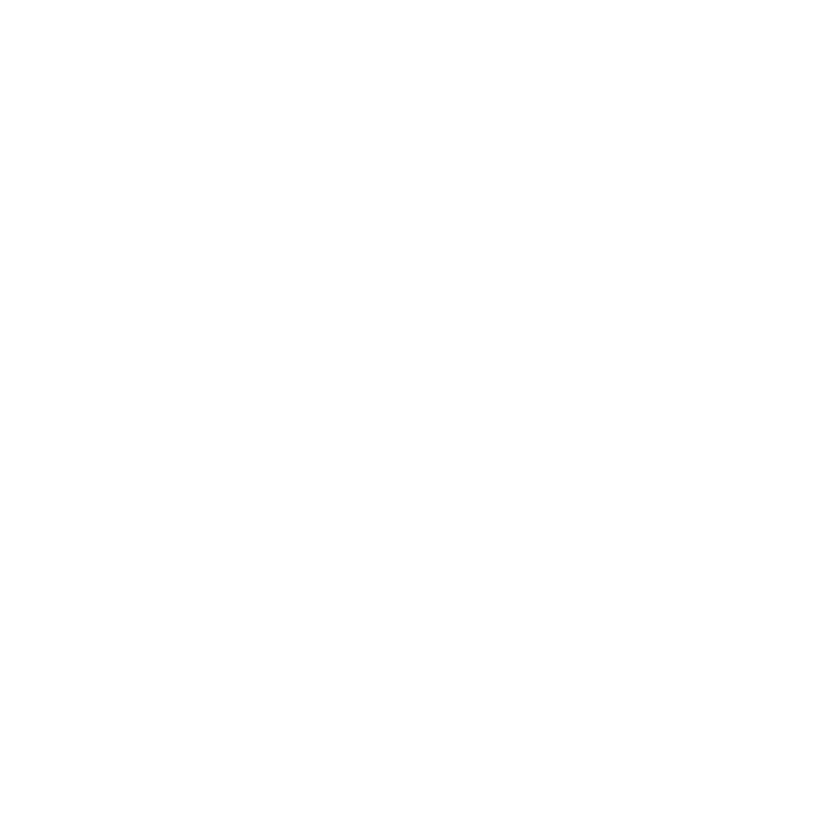

In [105]:
AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(sample_locations)

End of notebook